In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Prepare data

In [2]:
data = pd.read_csv('./dataset-kNN.csv', delimiter=',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 699 non-null    int64 
 1   clump_thickness    699 non-null    int64 
 2   size_uniformity    699 non-null    int64 
 3   shape_uniformity   699 non-null    int64 
 4   marginal_adhesion  699 non-null    int64 
 5   epithelial_size    699 non-null    int64 
 6   bare_nucleoli      699 non-null    object
 7   bland_chromatin    699 non-null    int64 
 8   normal_nucleoli    699 non-null    int64 
 9   mitoses            699 non-null    int64 
 10  class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [3]:
data.head(10)

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1276091,6,1,1,3,2,1,1,1,1,2
1,1280258,4,1,1,1,2,1,1,2,1,2
2,1293966,4,1,1,1,2,1,1,1,1,2
3,1296572,10,9,8,7,6,4,7,10,3,4
4,1298416,10,6,6,2,4,10,9,7,1,4
5,1299596,6,6,6,5,4,10,7,6,2,4
6,1105524,4,1,1,1,2,1,1,1,1,2
7,1181685,1,1,2,1,2,1,2,1,1,2
8,654546,1,1,1,3,2,1,1,1,1,2
9,695091,5,10,10,5,4,5,4,4,1,4


In [4]:
# Convert bare_nucleoli to numeric
data['bare_nucleoli'] = pd.to_numeric(data['bare_nucleoli'], errors='coerce')

# Convert the classes to 0 (benign) and 1 (malignant) for using in the classifier
data['class'] = data['class'].map({2: 0, 4: 1})

# Fill in Missing values, if exist (try using Mode value)
data.fillna(data.mode().iloc[0],inplace=True)

# Drop non-value added features
data = data.drop(['id'], axis=1)

## Train test split

In [5]:
X = data.drop(columns=['class'])
y = data['class']

# Normalize the features
std = StandardScaler()
X_scaled = std.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1234)

## Tuning of k value and plot

In [6]:
# Initialize lists to store k values and corresponding accuracies
k_values = range(1, 11)
accuracies = []

# Loop over different k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    accuracy = knn.score(X_train, y_train)
    accuracies.append(accuracy)

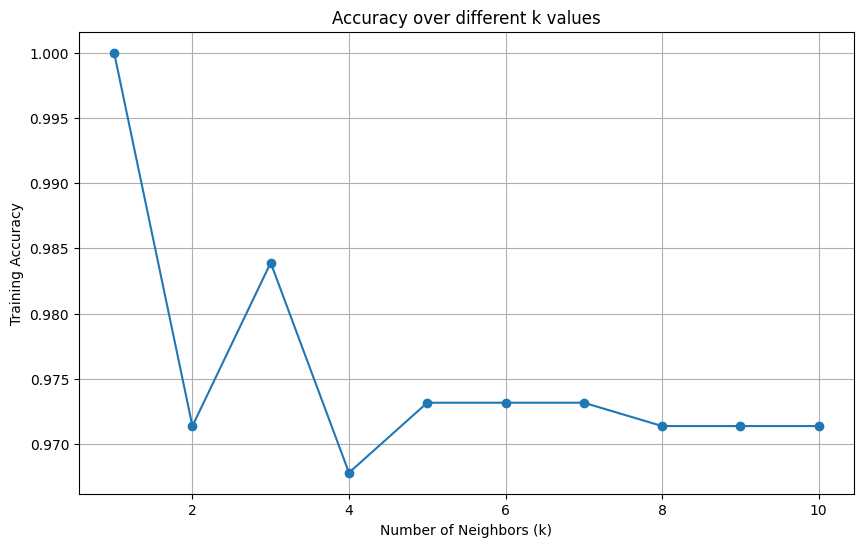

In [7]:
# Plot the accuracy scores over different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('Accuracy over different k values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Training Accuracy')
plt.grid()
plt.show()

## Train the final model

In [8]:
selected_k = 3

final_model = KNeighborsClassifier(n_neighbors=selected_k, metric='minkowski', p=2)
final_model.fit(X_train, y_train)
test_accuracy = final_model.score(X_test, y_test)
print(f"\nFinal test set accuracy with k={selected_k}: {test_accuracy:.4f}")

y_pred = final_model.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Final test set accuracy with k=3: 0.9643

Confusion Matrix:
[[97  3]
 [ 2 38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       100
           1       0.93      0.95      0.94        40

    accuracy                           0.96       140
   macro avg       0.95      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



## Extra: Try to fine the best k for test data

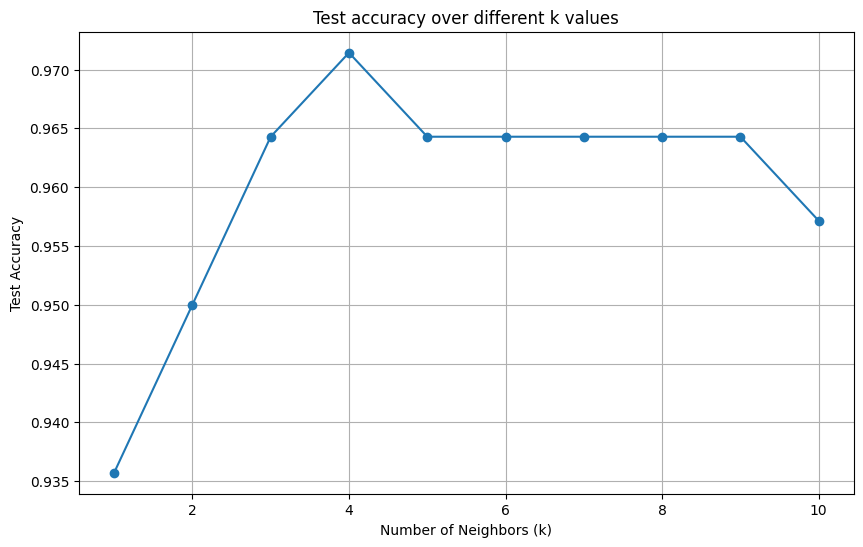

In [9]:
test_accuracies = []
for k in k_values:
    final_model = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    final_model.fit(X_train, y_train)
    test_accuracy = final_model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, test_accuracies, marker='o', linestyle='-')
plt.title('Test accuracy over different k values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Test Accuracy')
plt.grid()
plt.show()